# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [ ]:
#There is a resource which goes through a whole modelling process also talks about RFE and decreases in R squared, 
#and also mentions something that we will take a look at tonight, which is cross-validation.
#https://medium.com/@feraguilari/multiple-regression-and-recursive-feature-elimination-rfe-34af0c6ae51b



In [1]:
import pandas as pd
import numpy as np

In [2]:
# from Caner: to build a App: https://www.heroku.com/

## Regression Model Evaluation

In [3]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)# random state should be 100

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train, y_train)

predict= reg.predict(X_train)
r2_score(y_train, predict)

0.7337332767917557

In [8]:
predict1= reg.predict(X_test)
r2_score(y_test, predict1)

0.7555033086871306

In [9]:
# if the r2 of above two models are very different, then we will have 
# the overfitting problem. 

## 3. Calculate and print R-squared for both the training and the testing set.

## 4. Calculate and print mean squared error for both the training and the testing set.

In [10]:
from sklearn.metrics import mean_squared_error
print('MSE training set:',  mean_squared_error(y_train, predict))
print('MSE test set:',  mean_squared_error(y_test, predict1))

MSE training set: 21.649376911833603
MSE test set: 23.616994100563623


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [11]:
from sklearn.metrics import mean_absolute_error
print('MAE training set:',  mean_absolute_error(y_train, predict))
print('MAE test set:',  mean_absolute_error(y_test, predict1))

MAE training set: 3.265718383964076
MAE test set: 3.248482087616415


## Classification Model Evaluation

In [12]:
from sklearn.datasets import load_iris

data = load_iris()

X1 = pd.DataFrame(data["data"], columns=data["feature_names"])
y1 = pd.DataFrame(data["target"], columns=["class"])

data1 = pd.concat([X1, y1], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [13]:
y1['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [14]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
X_train1, X_test1, y_train1, y_test1=train_test_split(X1, y1, test_size=0.2, random_state=100)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 500).fit(X_train1, y_train1)
logpred = logreg.predict(X_train1)
r2_score(logpred, y_train1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9610347440199156

In [17]:
logpred1 = logreg.predict(X_test1)
r2_score(logpred1, y_test1)

0.9595141700404859

In [18]:
# in theory in classification problems we use accucy score, not r-square. 

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [25]:
from sklearn.metrics import accuracy_score

print('accuray score for training part:', accuracy_score(y_train1, logpred))
print('accuray score for test part:', accuracy_score(y_test1, logpred1))

logreg.score(X_test1, y_test1) # another way for accuracy score

accuray score for training part: 0.975
accuray score for test part: 0.9666666666666667


0.9666666666666667

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [20]:
from sklearn.metrics import balanced_accuracy_score
print('balanced accuray score for training part:', balanced_accuracy_score(y_train1, logpred))
print('balanced accuray score for test part:', balanced_accuracy_score(y_test1, logpred1))


balanced accuray score for training part: 0.975839475839476
balanced accuray score for test part: 0.9444444444444445


In [ ]:
#balanced_accuracy_score is the average of recall obtained on each class.
# average of crecall for A, and Recall for B.

## 10. Calculate and print the precision score for both the training and the testing set.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision score for training part:', precision_score(y_train1, logpred, pos_label=1, average=None))
print('precision score for test part:', precision_score(y_test1, logpred1, pos_label=1, average=None))


precision score for training part: [1.         0.97674419 0.94736842]
precision score for test part: [1.         1.         0.92857143]


## 11. Calculate and print the recall score for both the training and the testing set.

In [22]:
print('recall score for training part:', recall_score(y_train1, logpred, pos_label=1, average=None))
print('recall score for test part:', recall_score(y_test1, logpred1, pos_label=1, average=None))


recall score for training part: [1.         0.95454545 0.97297297]
recall score for test part: [1.         0.83333333 1.        ]


## 12. Calculate and print the F1 score for both the training and the testing set.

In [23]:

print('f1 score for training part:', f1_score(y_train1, logpred, pos_label=1, average=None))
print('f1 score for test part:', f1_score(y_test1, logpred1, pos_label=1, average=None))


f1 score for training part: [1.         0.96551724 0.96      ]
f1 score for test part: [1.         0.90909091 0.96296296]


## 13. Generate confusion matrices for both the training and the testing set.

In [37]:
# confusion matrix for test part:
from sklearn.metrics import confusion_matrix
cf_matrix_test_set=confusion_matrix(y_test1, logpred1)
print(cf_matrix_test_set)

[[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


In [38]:
# predicted series
pd.Series(logpred1).value_counts()

2    14
0    11
1     5
dtype: int64

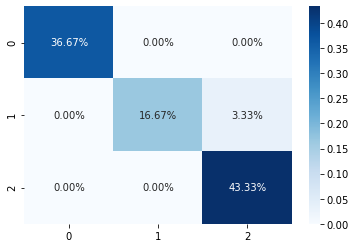

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix_test_set/np.sum(cf_matrix_test_set), annot=True, fmt='.2%', cmap='Blues')
plt.label= ("confusion matrix test part")
plt.show()

In [39]:
# confusion matrix for training part:
cf_matrix = confusion_matrix(y_train1, logpred)
print(cf_matrix)



[[39  0  0]
 [ 0 42  2]
 [ 0  1 36]]


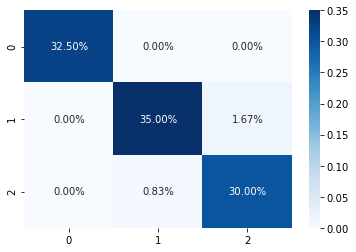

In [40]:

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.label= ("confusion matrix training part")
plt.show()

In [ ]:
# now we should do the Recall and Precision and f1 score for 
# the above confusion matrix. 

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.